## Data Visualization - Python

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#diamonds_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/diamonds.csv"
#diamonds_df = pd.read_csv(diamonds_url)
diamonds_df = sns.load_dataset('diamonds')

In [3]:
diamonds_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds_df.shape

(53940, 10)

In [5]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
diamonds_low_df = diamonds_df.loc[diamonds_df['cut'] == 'Ideal']
diamonds_low_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78


In [7]:
diamonds_df['price_per_carat'] = diamonds_df['price'] / diamonds_df['carat']

In [8]:
diamonds_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [10]:
import numpy as np

In [11]:
diamonds_df['high_price'] = np.where(diamonds_df['price_per_carat'] > 3500, 1, 0)
diamonds_df.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,high_price
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3829.166667,1
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3829.166667,1
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3938.571429,1
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3205.813953,0
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,3676.000000,1


In [12]:
import math
diamonds_df['rounded_price'] = diamonds_df['price_per_carat'].apply(math.ceil)
diamonds_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,high_price,rounded_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,0,1418
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,0,1553
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,0,1422
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,0,1152
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,0,1081


In [13]:
#Function to round price to nearest 100
def round_nearest_100(x):
    y = math.ceil(x/100)*100
    return y
diamonds_df['100_round'] = diamonds_df['price'].apply(round_nearest_100)
diamonds_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,high_price,rounded_price,100_round
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,0,1418,400
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,0,1553,400
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,0,1422,400
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,0,1152,400
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,0,1081,400


### Drop some columns

In [15]:
diamonds_df = diamonds_df.drop(columns=['high_price', '100_round', 'price_per_carat'])
diamonds_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,rounded_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1418
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1553
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1422
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1152
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1081


## Let's plot Data

array([[<AxesSubplot:title={'center':'carat'}>]], dtype=object)

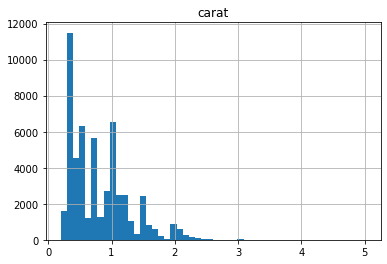

In [16]:
diamonds_df.hist(column='carat', bins = 50)

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat'>

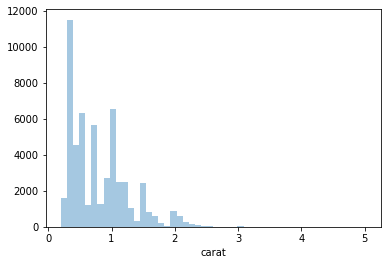

In [17]:
sns.distplot(diamonds_df.carat, kde=False)

In [18]:
diamonds_df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [19]:
cut_count_table = pd.crosstab(index = diamonds_df['cut'], columns = 'count')
cut_count_table

col_0,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


<AxesSubplot:xlabel='cut'>

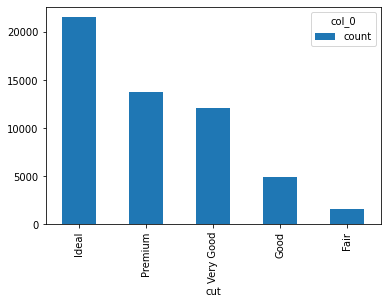

In [20]:
cut_count_table.plot(kind='bar')

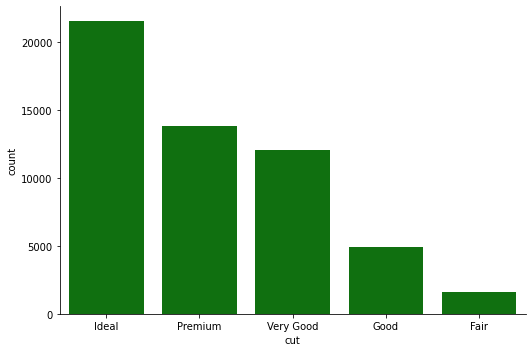

In [21]:
sns.catplot(data = diamonds_df, x="cut", y=None, aspect = 1.5, kind = "count", color = "g")

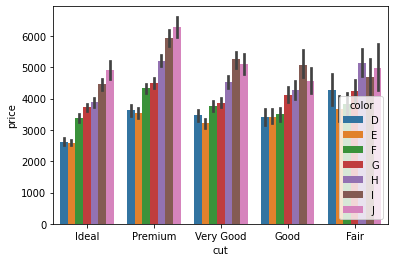

In [22]:
ax = sns.barplot(x="cut", y="price", hue='color', data=diamonds_df)